In [1]:
!pip install featuretools

In [2]:
import featuretools as ft

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
clean_data_all_college30=pd.read_csv('../Data/clean_data_all_college30.csv')

In [132]:
clean_data_all_college30.describe()

,year_applying,gre_score,undergraduation_score,work_ex,test_score_ielts,test_score_toefl,gre_score_verbal,gre_score_quant
count,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000
mean,2018.375542,313.718787,3.045756,16.357621,0.972529,88.249015,151.173494,162.545293
std,0.998407,8.958167,0.491464,15.994524,2.457314,36.615316,2.646836,7.883203
min,2011.000000,260.000000,0.000000,0.000000,0.000000,0.000000,145.000000,107.000000
25%,2018.000000,308.000000,2.750000,2.000000,0.000000,93.000000,149.000000,158.000000
50%,2019.000000,314.000000,3.120000,14.000000,0.000000,102.000000,151.000000,163.000000
75%,2019.000000,320.000000,3.410000,26.000000,0.000000,108.000000,153.000000,168.000000
max,2021.000000,340.000000,4.000000,153.000000,8.500000,120.000000,158.000000,189.000000


In [133]:
#filtering out outlier records with quant scores less than 130 which is not possible
clean_data_all_college30=clean_data_all_college30.loc[clean_data_all_college30['gre_score_quant']>=130,:]

In [134]:
clean_data_all_college30.reset_index(drop=True,inplace=True)
#checking the stats of data after removing some outliers
clean_data_all_college30.describe()

,year_applying,gre_score,undergraduation_score,work_ex,test_score_ielts,test_score_toefl,gre_score_verbal,gre_score_quant
count,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000
mean,2018.375912,313.765228,3.046353,16.369801,0.973487,88.247388,151.173073,162.592155
std,0.997645,8.834929,0.491010,15.995725,2.458335,36.626013,2.647466,7.739673
min,2011.000000,281.000000,0.000000,0.000000,0.000000,0.000000,145.000000,131.000000
25%,2018.000000,308.000000,2.750000,2.000000,0.000000,93.000000,149.000000,158.000000
50%,2019.000000,314.000000,3.120000,14.000000,0.000000,102.000000,151.000000,163.000000
75%,2019.000000,320.000000,3.410000,26.000000,0.000000,108.000000,153.000000,168.000000
max,2021.000000,340.000000,4.000000,153.000000,8.500000,120.000000,158.000000,189.000000


In [135]:
#checking if we have distribution of admits and rejects across all universities to see
clean_data_all_college30.groupby(by=['university_name'])['status'].value_counts(normalize=True)*100

university_name                              status
carnegie mellon university                   Reject    87.272727
                                             Admit     12.727273
clemson university                           Admit     65.517241
                                             Reject    34.482759
george mason university                      Admit     61.855670
                                             Reject    38.144330
georgia institute of technology              Reject    81.632653
                                             Admit     18.367347
illinois institute of technology             Admit     60.000000
                                             Reject    40.000000
indiana university bloomington               Admit     63.492063
                                             Reject    36.507937
kansas state university                      Admit     59.740260
                                             Reject    40.259740
michigan technological university     

In [136]:
todict=clean_data_all_college30.groupby(by=['university_name'])['status'].value_counts(normalize=True)*100

In [137]:
accepts_rejects=todict.to_dict()

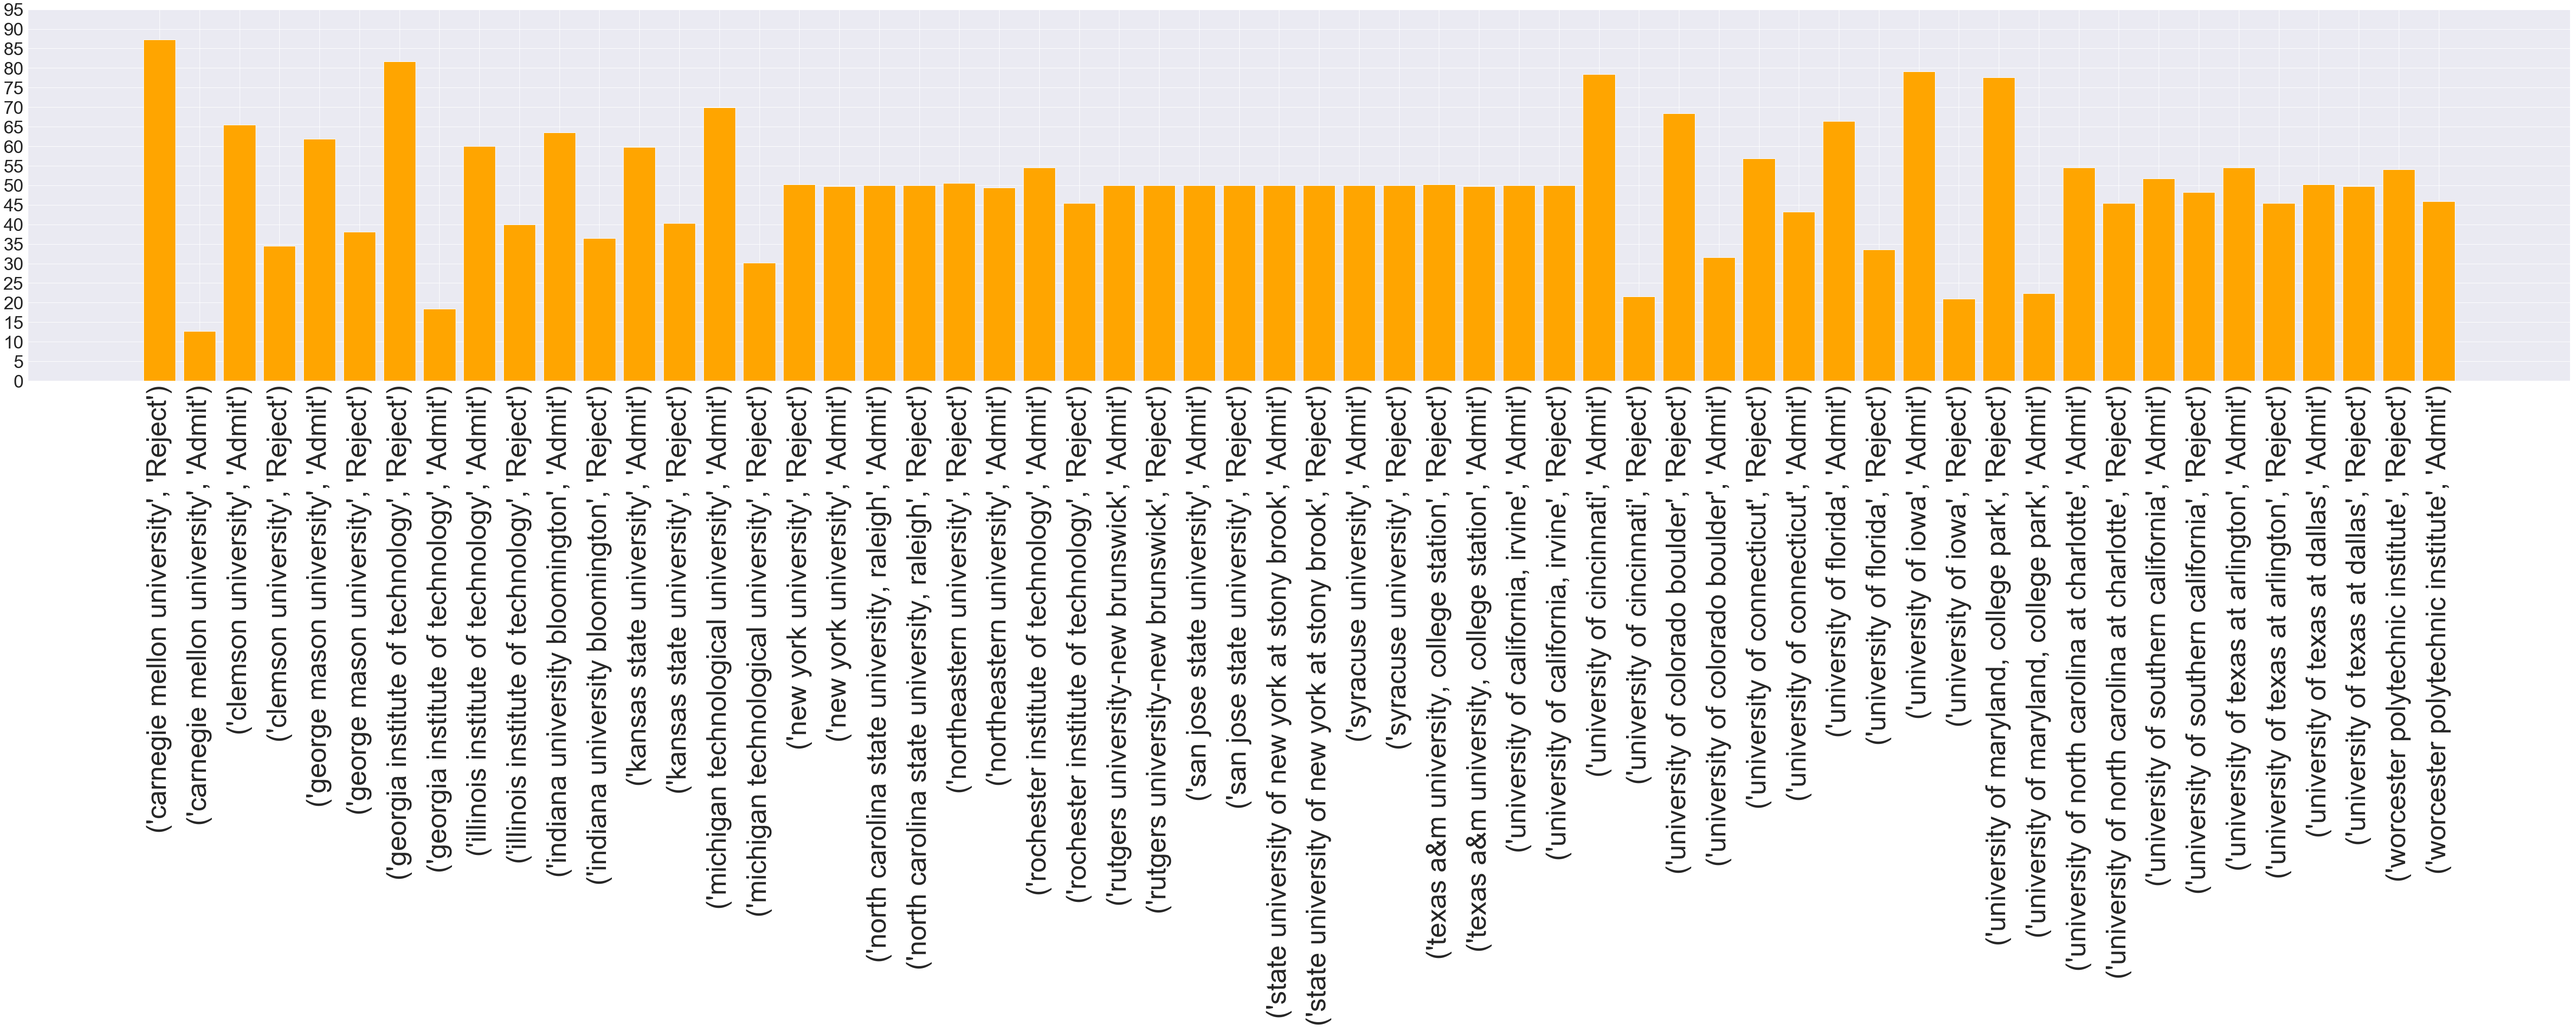

In [138]:
plt.figure(figsize=(100,15))
plt.bar(range(len(accepts_rejects)), list(accepts_rejects.values()), align='center', color=['Orange'])
plt.xticks(range(len(accepts_rejects)), list(accepts_rejects.keys()),rotation=90, fontsize=60)
plt.yticks(np.arange(0,100,5),fontsize=40)
plt.show()

#### On the available data that we have, IVY league Universities like CMU,GTech, Maryland have less acceptance rates <15% and other universities have more than 30% to 60% accepts data. Hence we can say that we have data with normal distribution

In [140]:
#mapping labels with 0 for Admit and 1 for Reject to check correlation and saving it 'target' feature
clean_data_all_college30['target']=clean_data_all_college30['status'].apply(lambda x:1 if x=='Admit' else 0)

C:\Users\navee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


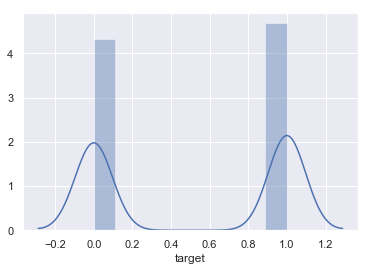

In [141]:
sns.distplot(clean_data_all_college30['target'])

<h5> Overall data is following normal distribution on both accepts and rejects <h5>

In [142]:
clean_data_all_college30.isna().sum()

student_name             0
university_name          0
year_applying            0
status                   0
gre_score                0
eng_test                 0
undergraduation_score    0
work_ex                  0
test_score_ielts         0
test_score_toefl         0
term_applying            0
gre_score_verbal         0
gre_score_quant          0
target                   0
dtype: int64

In [143]:
clean_data_all_college30.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5073 entries, 0 to 5072
Data columns (total 14 columns):
student_name             5073 non-null object
university_name          5073 non-null object
year_applying            5073 non-null int64
status                   5073 non-null object
gre_score                5073 non-null float64
eng_test                 5073 non-null object
undergraduation_score    5073 non-null float64
work_ex                  5073 non-null int64
test_score_ielts         5073 non-null float64
test_score_toefl         5073 non-null float64
term_applying            5073 non-null object
gre_score_verbal         5073 non-null int64
gre_score_quant          5073 non-null float64
target                   5073 non-null int64
dtypes: float64(5), int64(4), object(5)
memory usage: 554.9+ KB


In [144]:
numerical_data = clean_data_all_college30.select_dtypes(include = ['int64','float64'])
categorical_data = clean_data_all_college30.select_dtypes(include = ['object'])
categorical_features = categorical_data.columns.values
numerical_features = numerical_data.columns.values

In [145]:
categorical_features

array(['student_name', 'university_name', 'status', 'eng_test',
       'term_applying'], dtype=object)

In [146]:
numerical_features

array(['year_applying', 'gre_score', 'undergraduation_score', 'work_ex',
       'test_score_ielts', 'test_score_toefl', 'gre_score_verbal',
       'gre_score_quant', 'target'], dtype=object)

In [147]:
labels=clean_data_all_college30['status'].unique().tolist()

In [148]:
labels

['Admit', 'Reject']

In [149]:
#checking correlation across all numerical features against our target variable
clean_data_all_college30.corr()['target'].sort_values(ascending=False)

target                   1.000000
undergraduation_score    0.169144
gre_score                0.099614
gre_score_verbal         0.089195
gre_score_quant          0.083200
year_applying            0.030988
test_score_toefl         0.013218
test_score_ielts         0.002238
work_ex                 -0.061636
Name: target, dtype: float64

### every feature except work_ex is showing a positive correlation which means higher numbers will fetch you admit

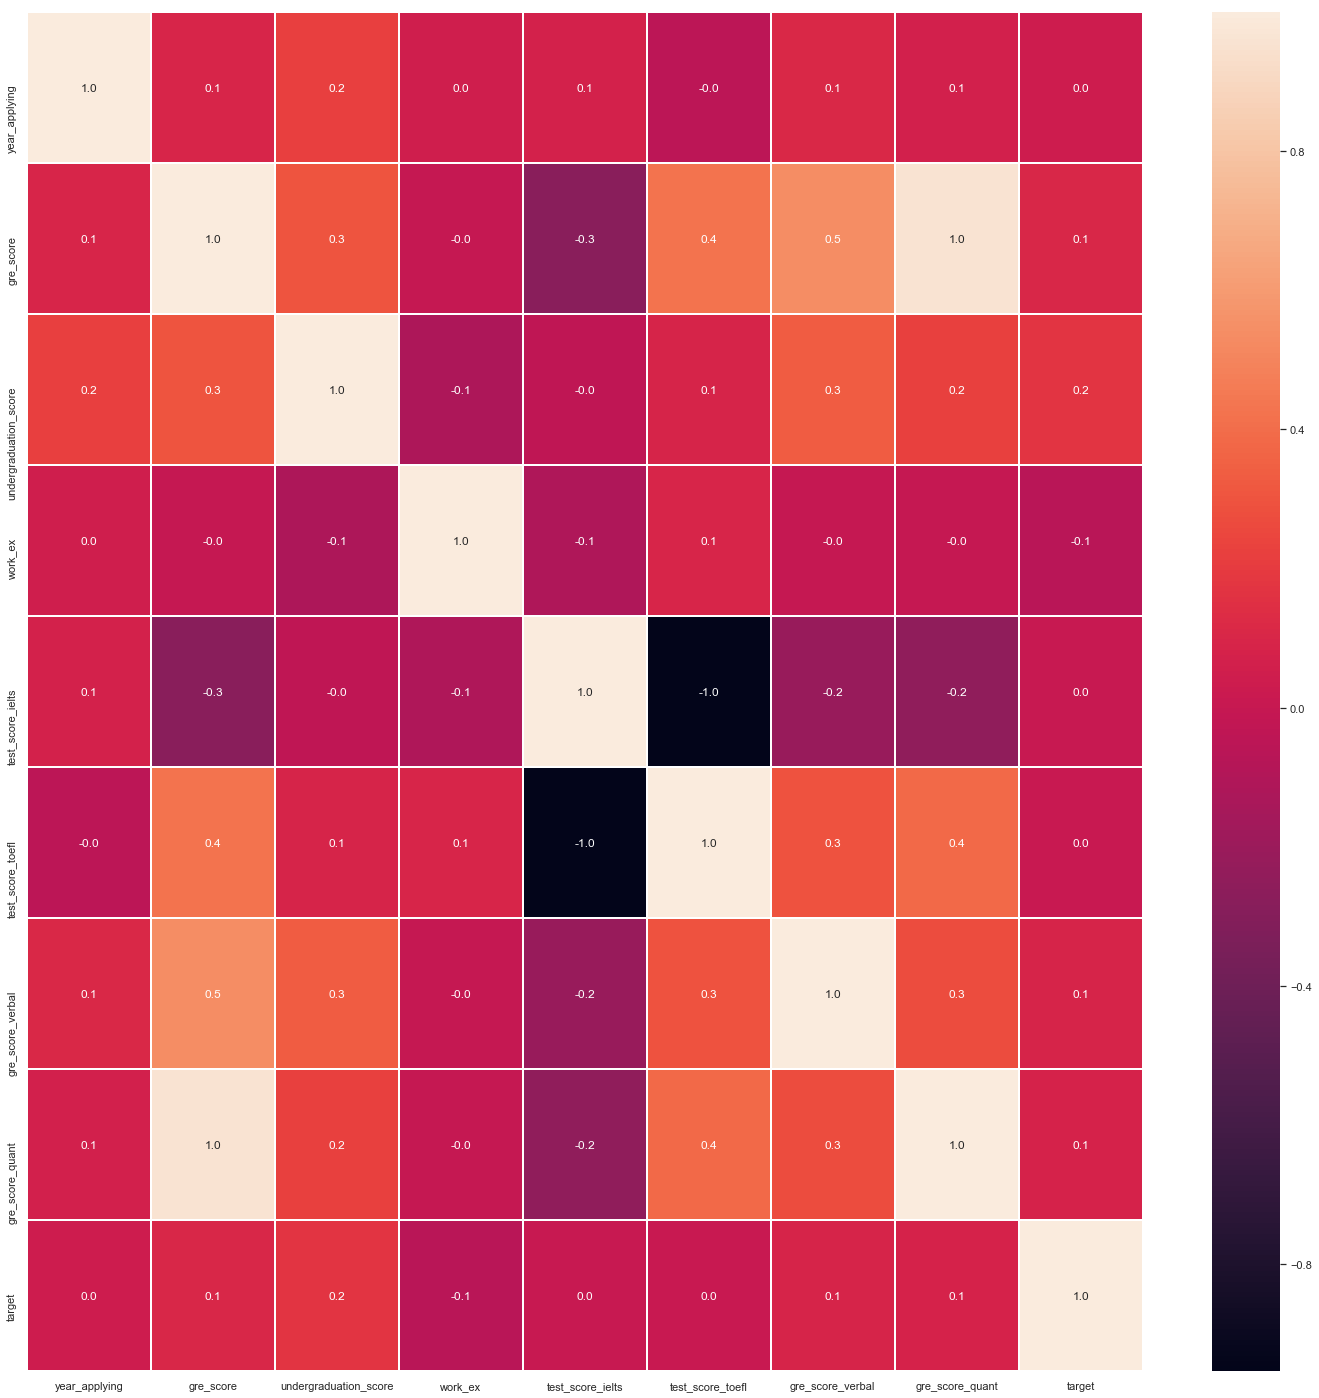

In [150]:
#checking for highly correlated features
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(clean_data_all_college30.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

#### toeflscores and ielts scores are showing highly negative correlation, since we have two different columns where toefl will be zero if user has taken ielts and vice versa
#### we will handle it by dropping one of the feature while replacing toefl column with ielts scores(0-9) scaled to toelf(0-120) based on the scale provided by ETS in https://www.ets.org/toefl/institutions/scores/compare/

![title](toeflscale.png)

In [151]:
clean_data_all_college30['test_score_ielts'] = pd.cut(clean_data_all_college30.test_score_ielts, bins=[-1,0.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9], labels=[0,31,34,45,59,78,93,101,109,114,117,120])

In [152]:
#scaling ielts scores and replacing them in toefl scores column
clean_data_all_college30.loc[clean_data_all_college30['test_score_toefl']==0,'test_score_toefl']=clean_data_all_college30['test_score_ielts']

In [153]:
clean_data_all_college30.drop(columns=['test_score_ielts'],inplace=True)

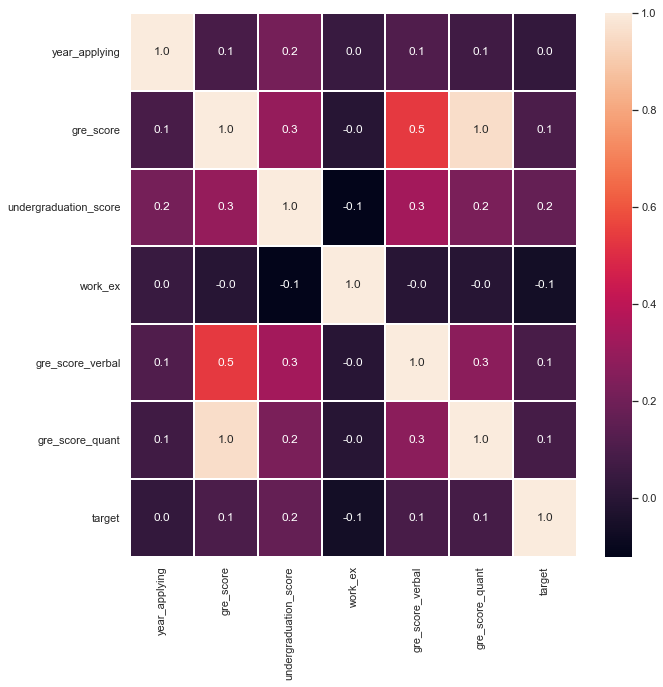

In [154]:
#checking for highly correlated features
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(clean_data_all_college30.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

- gre_score and gre_quant are showing high collinearity, so we are dropping gre_score since we also have gre_verbal scores

In [155]:
gre_scores = clean_data_all_college30.pop('gre_score')

In [156]:
clean_data_all_college30.test_score_toefl=clean_data_all_college30.test_score_toefl.astype('int64')

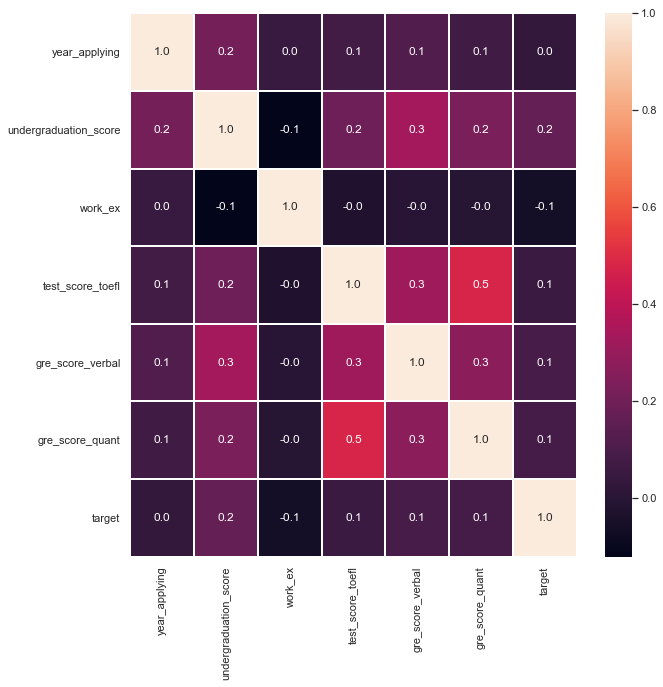

In [157]:
#checking for highly correlated features
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(clean_data_all_college30.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

In [158]:
#checking correlation across all numerical features against our target variable
clean_data_all_college30.corr()['target'].sort_values(ascending=False)

target                   1.000000
undergraduation_score    0.169144
gre_score_verbal         0.089195
gre_score_quant          0.083200
test_score_toefl         0.052283
year_applying            0.030988
work_ex                 -0.061636
Name: target, dtype: float64

- correlation says that undergrad_scores have more impact on decsion preceded by gre scores, toefl, year_applying

In [162]:
#to check how term(Fall,spring) effecting the decision, we will convert term to ordinal using one hot encoding
clean_data_all_college30['term_applying_spring']=pd.get_dummies(clean_data_all_college30['term_applying'],prefix='term_applying',drop_first=True)

In [165]:
clean_data_all_college30.drop(columns=['term_applying'],inplace=True)

In [168]:
#checking correlation across all numerical features against our target variable
clean_data_all_college30.corr()['target'].sort_values(ascending=False)

target                   1.000000
undergraduation_score    0.169144
gre_score_verbal         0.089195
gre_score_quant          0.083200
test_score_toefl         0.052283
year_applying            0.030988
term_applying_spring    -0.025279
work_ex                 -0.061636
Name: target, dtype: float64

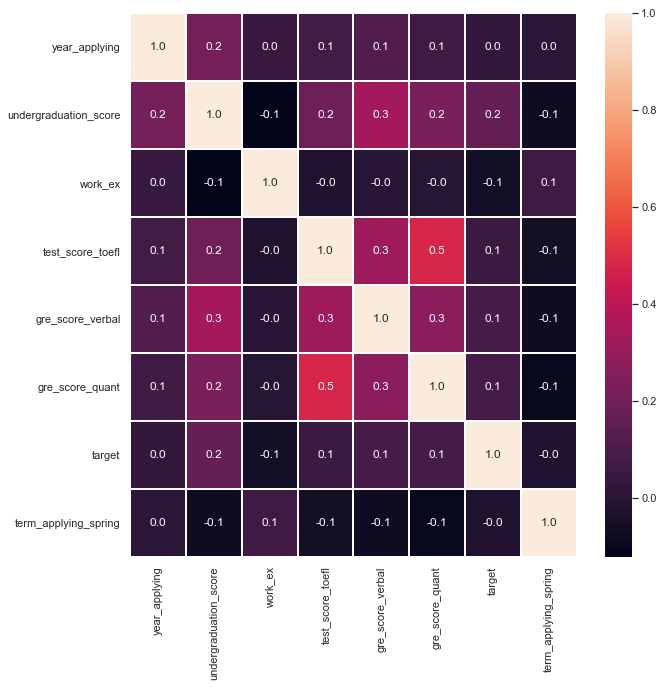

In [167]:
#checking for highly correlated features
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(clean_data_all_college30.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

C:\Users\navee\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


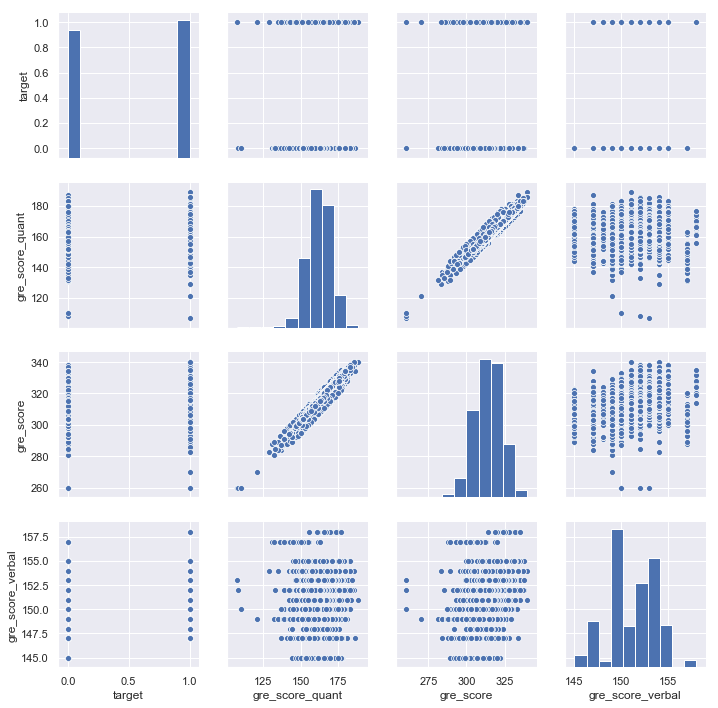

In [44]:
#scatterplot
sns.set()
cols = ['target','gre_score_quant','gre_score_verbal','term_applying_spring']
sns.pairplot(clean_data_all_college30[cols], size = 2.5)
plt.show();

In [169]:
len(clean_data_all_college30.university_name.unique())

29

In [170]:

required_colleges = ['northeastern university','illinois institute of technology','michigan technological university','rochester institute of technology','university of southern california','university of north carolina at charlotte','university of texas at arlington','university of texas at dallas','syracuse university','clemson university','new york university','indiana university bloomington','rutgers university-new brunswick','san jose state university','university of florida','Carnegie Mellon University','Georgia Institute of Technology','University of Colorado Boulder','North Carolina State University, Raleigh','University of Iowa','University of Connecticut','Worcester Polytechnic Institute','University of South Carolina','Kansas State University','University of Cincinnati','university of maryland, college park','University of California, Irvine','Texas A&M University, College Station','State University of New York at Stony Brook','George Mason University']
required_colleges = [x.lower() for x in required_colleges]
required_colleges_ranking = [15,97,117,66,19,49,64,52,118,89,22,48,25,150,62,1,9,58,30, 71, 70,79, 76, 115, 130, 10, 23, 31, 35, 59]
dictionary_req_college = dict(zip(required_colleges, required_colleges_ranking))
dictionary_req_college
clean_data_all_college30['ranking'] = clean_data_all_college30['university_name']
clean_data_all_college30['ranking'].replace(dictionary_req_college,inplace=True)

In [171]:
clean_data_all_college30

,student_name,university_name,year_applying,status,eng_test,undergraduation_score,work_ex,test_score_toefl,gre_score_verbal,gre_score_quant,target,term_applying_spring,ranking
0,Abdul kadir,northeastern university,2019,Admit,TOEFL,3.52,4,114,152,165.0,1,0,15
1,Yashwanth Reddy,northeastern university,2019,Admit,TOEFL,3.26,24,103,152,162.0,1,0,15
2,Raj Shrivastava,northeastern university,2019,Admit,TOEFL,3.12,6,108,152,172.0,1,0,15
3,Sumeet Bhadale,northeastern university,2019,Admit,TOEFL,3.28,13,106,152,153.0,1,0,15
4,piyush goel,northeastern university,2019,Admit,TOEFL,2.88,8,112,152,172.0,1,0,15
5,Kamineni sai sugeeth,northeastern university,2019,Admit,TOEFL,2.80,4,102,152,166.0,1,0,15
6,Daman M,northeastern university,2019,Admit,TOEFL,3.35,48,114,152,175.0,1,0,15
7,Utsav Das,northeastern university,2019,Admit,TOEFL,3.54,1,120,152,182.0,1,0,15
8,Shankar Telaprolu,northeastern university,2019,Admit,IELTS,3.68,5,93,152,160.0,1,0,15
9,Aayush Atul Kubitkar,northeastern university,2019,Admit,TOEFL,2.87,30,99,152,167.0,1,0,15


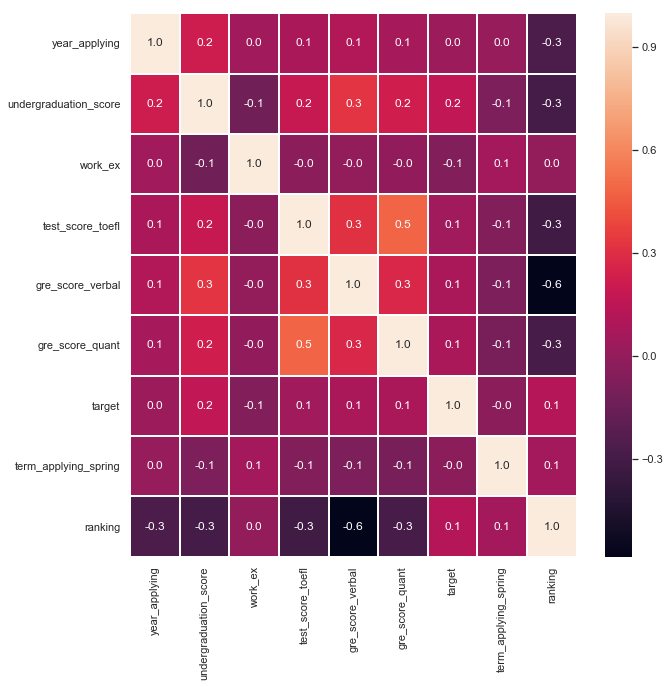

In [172]:
#checking for highly correlated features
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(clean_data_all_college30.corr(), annot=True, linewidths=1, fmt= '.1f',ax=ax)
plt.show()

In [173]:
#checking correlation across all numerical features against our target variable
clean_data_all_college30.corr()['target'].sort_values(ascending=False)

target                   1.000000
undergraduation_score    0.169144
ranking                  0.120418
gre_score_verbal         0.089195
gre_score_quant          0.083200
test_score_toefl         0.052283
year_applying            0.030988
term_applying_spring    -0.025279
work_ex                 -0.061636
Name: target, dtype: float64

In [176]:
clean_data_all_college30.to_csv('../Data/feature_engineeriing_all_college30.csv',index=False)